# DataCube Library Project

This project is an implementation of a Python library that provides an interface to interact with a WCPS server. It implements a datacube object with some methods which generate WCPS queries, send them to the server, fetch results, and update internal state accordingly.

This notebook offers a step-by-step interactive tutorial on how install the libary's prerequisites, and how to use the Python DataCube library in this repository. Results are displayed and stored in the notebook.

## Install and Usage Prerequisites

There are several prerequisites needed to run this library. 

### Library Installations

Installing these is easy. Simply run the following command in your shell. If you would like to see the complete list of requirements, please check the requirements.txt file.

In [ ]:
pip install -r ../requirements.txt

### Python Imports

The following are the necessary libraries and classes that must be imported before usage. The parent folder, /sprint_2, is also added to the path to facilitate said imports.

In [24]:
# Necessary imports
import sys
sys.path.append("..")
from IPython.display import Image
from wdc.dco import Datacube
from wdc.dbc import DatabaseConnection
import matplotlib.pyplot as plt
import io

### User-defined Server Endpoint

The URL "https://ows.rasdaman.org/rasdaman/ows" is used to establish a connection to the WCPS server.

To meet grading requirements, the user is given the liberty to change this for another server URL by changing the SERVER_ENDPOINT variable below, or by passing a different URL as a parameter when creating a DatabaseConnection(). It is worth noting, however, that this software is coded specifically to work with the Rasdaman WCPS server, so no other server endpoints would work.

In [25]:
SERVER_ENDPOINT = "https://ows.rasdaman.org/rasdaman/ows"

## Using the Library

Several sample executions will now be shown, showing the capabilities of the library.

### Example 1: Basic Usage

After importing the necessary libraries and classes, a dbc (DatabaseConnection) object is intialized. This same dbc will be used for all subsequent Datacubes. The creation of a Datacube is demonstrated; for this example, a coverage that returns an image is used. The last 5 lines show how you can display these results using Matplotlib.

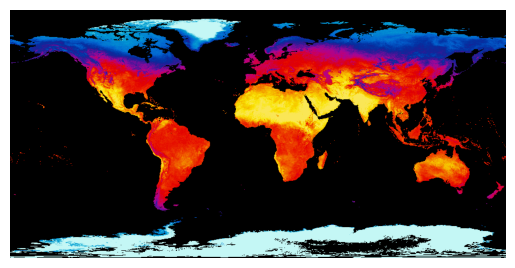

In [26]:
# Creating dbc and Datacube
con = DatabaseConnection(SERVER_ENDPOINT)
datacube = Datacube(con, coverage_id='AvgTemperatureColorScaled', encode='image/png')

# Modifying functionalities
modify_ans = {"ansi": "2000-04"}
slice_datacube = datacube.slice(modify_ans)
datat = slice_datacube.execute()

# Image(data)
image2 = plt.imread(io.BytesIO(datat))

# Display the image using Matplotlib
plt.imshow(image2)
plt.axis('off') # Optional: Turn off axis
plt.show()

### Example 2: 3D -> 1D Subset

This example shows the creation of a second datacube. This time, a coverage that returns text results is used. For ease of processing, this result is enconded in a CSV format. The slice and execute methods are once again used to process the query. The following lines decode the response, and the appropriate Matplot methods are used to display the results.

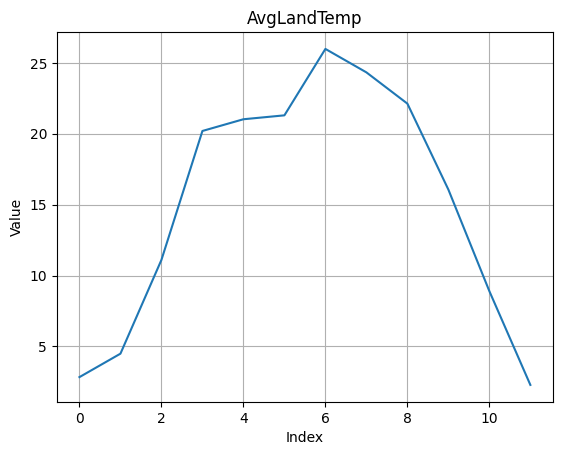

In [27]:
# Creating Datacube
datacube1 = Datacube(con, coverage_id='AvgLandTemp', encode='text/csv')
subset = {"ansi": ("2014-01", "2014-12"), "Lat": (53.08), "Lon": (8.80)}
slice_datacube1 = datacube1.slice(subset)
data_bytes = slice_datacube1.execute()

# Decode response
data_str = data_bytes.decode('utf-8')

# Set plot axes
y_values = [float(val) for val in data_str.split(',')]
x_values = range(len(y_values))

# Plot using Matplot
plt.plot(x_values, y_values)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title(f'{slice_datacube1.coverage_id}')
plt.grid(True)
plt.show()

### Example 3: List of Average Temperatures

In [ ]:
datacube5 = Datacube(con, coverage_id='AvgLandTemp', encode='text/csv')
subset = {"ansi": ("2014-01", "2014-12"), "Lat": (53.08), "Lon": (8.80)}
slice_datacube5 = datacube5.slice(subset)
data_bytes1 = slice_datacube5.execute()
data_str1 = data_bytes1.decode('utf-8')
digits_list = [float(num) for num in data_str1.split(',')]
print(digits_list)


[Out]: [2.834646, 4.488189, 11.10236, 20.19685, 21.02362, 21.29921, 25.98425, 24.33071, 22.12598, 16.06299, 8.897637, 2.283465]

### Example 3: 3D -> 2D Subset

This example shows the creation of a third datacube. This datacube uses a similar coverage and encoding as the first one, but an alternative method of obtaining information is used (the .get() method). The rest of the methods for Matplot remain the same.

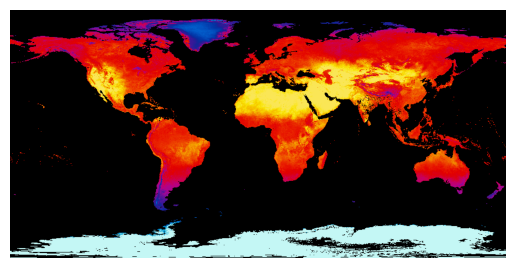

In [28]:
datacube2 = Datacube(con, coverage_id='AvgTemperatureColorScaled', encode='image/png')
datat1 = datacube2.get('2014-07')
Image(datat1)
# Convert the image data to a format compatible with Matplotlib
image = plt.imread(io.BytesIO(datat1))
# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis
plt.show()

### Example 4: DataCube Modification

This example modifies an existing datacube instead of creating a new one. The same coverage is used, but a different set of information is requested and displayed.

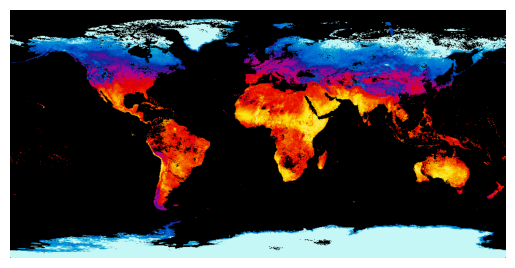

In [29]:
# Modifying functionalities of datacube2
modify_ans1 = {"ansi": "2000-02-01"}
subset_dc = datacube2.slice(modify_ans1)
data1 = subset_dc.execute()
Image(data1)
image1 = plt.imread(io.BytesIO(data1))

# Display the image using Matplotlib
plt.imshow(image1)
plt.axis('off') # Optional: Turn off axis
plt.show()

### Example 5: Celsius to Kelvin

Data obtained from datacubes can be freely manipulated before being displayed. This simple example is almost identical to Example 2, but alters the array of temperatures with a simple arithmethic operation to display results in degrees Kelvin instead of Celsius.

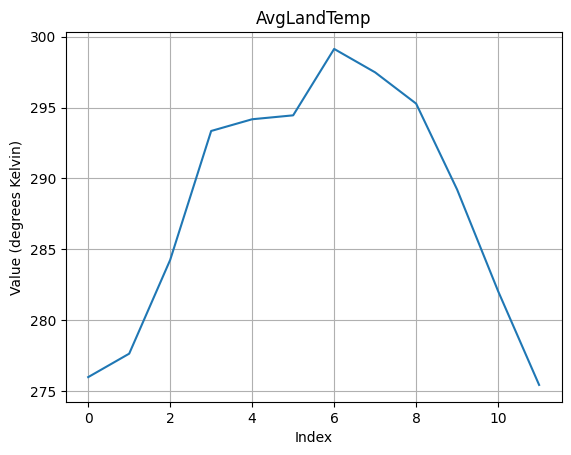

In [30]:
# Creating Datacube
datacube3 = Datacube(con, coverage_id='AvgLandTemp', encode='text/csv')
subset = {"ansi": ("2014-01", "2014-12"), "Lat": (53.08), "Lon": (8.80)}
slice_datacube3 = datacube3.slice(subset)
data_bytes = slice_datacube3.execute()

# Decode response
data_str = data_bytes.decode('utf-8')

# Set plot axes
y_values = [float(val) for val in data_str.split(',')]
x_values = range(len(y_values))

# Convert from degrees Celsius to degrees Kelvin
y_values_K = [celsius + 273.15 for celsius in y_values]

# Plot using Matplot
plt.plot(x_values, y_values_K)
plt.xlabel('Index')
plt.ylabel('Value (degrees Kelvin)')
plt.title(f'{slice_datacube1.coverage_id}')
plt.grid(True)
plt.show()

### Example 6: Min, Max, and Average

Similar to the previous example, arithmetic operations are performed with the information received from the server. However, here standard Python functions are applied on a 1D subset to perform the calculation of minimum, maximum, and average values. In this case, information is printed directly on the standard output instead of displayed with Matplot, showcasing another output method.

In [31]:
datacube4 = Datacube(con, coverage_id='AvgLandTemp', encode='text/csv')
subset = {"ansi": ("2014-01", "2014-12"), "Lat": (53.08), "Lon": (8.80)}
slice_datacube4 = datacube4.slice(subset)
data_bytes1 = slice_datacube4.execute()
data_str1 = data_bytes1.decode('utf-8')
digits_list = [float(num) for num in data_str1.split(',')]
size=len(digits_list)
min_value = min(digits_list)
max_value=max(digits_list)
avg_value=sum(digits_list)/size
print("Minimum value:", min_value,"\nMaximum value:",max_value,"\nAverage value",avg_value)

Minimum value: 2.283465 
Maximum value: 25.98425 
Average value 15.05249225


### Example of an Invalid Query

The following example demonstrates a query that the server cannot process. The appropriate error message and exception raised are displayed. This example is separate from the others.

In [32]:
# The server cannot cover this range 
datacube5 = Datacube(con, coverage_id='AvgLandTemp', encode='text/csv')
subset = {"ansi": ("2014-01", "2016-12"), "Lat": (53.08), "Lon": (8.80)}
slice_datacube5 = datacube5.slice(subset)
data_bytes = slice_datacube5.execute()
data_str = data_bytes.decode('utf-8')
y_values = [float(val) for val in data_str.split(',')]

x_values = range(len(y_values))


SyntaxError: invalid decimal literal (4281766611.py, line 13)

## Conclusion

This concludes the walkthrough of the library's features so far. For complimentary documentation and information, please consult the README file.